# Tips and Tricks for your first assignment

As a heads up for your first in-class assignment, you'll have to deal with some 'real world' csv dataset with some gaps, some dates and some categorical features. This file contains some hints:

In [ ]:
## We load the relevant modules

%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

np.random.seed(3123) # impose random seed for reproducibility

## Missing Data

To fill gaps, for this time you can remove columns with gaps, or even better, replace by a mean or most frequent value (e.g. with Simple Imputer, https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)



### Sample dataset
We will use Titanic passanger dataset to demonstrate.

Firstly we load the data and drop some uninteresting variables (recommendation: drop all the variables you are not able to manage if you have little time)

In [ ]:
data = pd.read_csv("https://github.com/barcelonagse-datascience/academic_files/raw/master/data/titanic3.csv")
print(data.shape)
data.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Just for simplicity, drop non-binary categorical variables and id vars
data = data.drop(['name','body','ticket','cabin','embarked','home.dest','boat'], axis=1)
# Set binary to dummy
data = pd.get_dummies(data, prefix=['sex'], columns=['sex'], drop_first = True)## the prefix is how to name the dummies
data.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male'], dtype='object')

### Identifying missing data

In [ ]:
# Report na
# Compute nulls per feature
Nulls = data.isnull().sum()
print(Nulls)


pclass        0
survived      0
age         263
sibsp         0
parch         0
fare          1
sex_male      0
dtype: int64


(1309, 7)


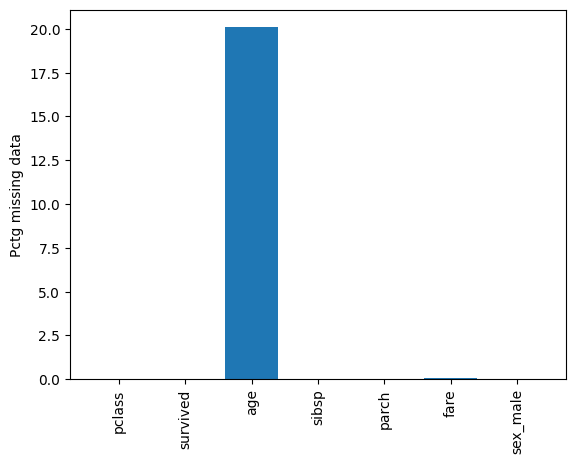

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(Nulls.index, 100*Nulls.values/len(data.index))
plt.ylabel('Pctg missing data')
print(data.shape)
# Age and fare, natural things to maybe be missing

In [ ]:
# Identifying Columns with Null variables
missing_data_col= data.columns[Nulls>0]
missing_data_col

Index(['age', 'fare'], dtype='object')

In [ ]:
# Split target data
X = data.drop(['survived'], axis=1)
y = data["survived"]  # This is the classification outcome: spam/not spam

print(X.shape)

(1309, 6)


### Remove empty columns/rows
First simple approach is to remove those rows or columns that have any empty value. We are going to do by columns, so that we keep same observations set for later comparison.

In [ ]:
# Remove columns with any missing data
X_removed = X.drop(axis = 1, labels = missing_data_col)

print(X_removed.shape)

(1309, 4)


check there is no longer any missing data

In [ ]:
X_removed.isnull().sum()


,0
pclass,0
sibsp,0
parch,0
sex_male,0


### Simple imputer

Or, if we don't want to throw away too much data, <i> sklearn's </i> <i> SimpleImputer </i> allows us replace misisng data by a mean or most frequent value - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

- First instantiate the imputer

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')

- Then apply to your data

In [ ]:
X_imp_mean = pd.DataFrame(imp_mean.fit_transform(X))

print(X_imp_mean.shape)

X_imp_mean.isnull().sum()

(1309, 6)


,0
0,0
1,0
2,0
3,0
4,0
5,0


## Dates

Dealing with dates requires some practice, so  you can just discard date columns. If you want to use them, as a hint, to parse date strings you can use datetime library (e.g. check this link https://www.programiz.com/python-programming/datetime/strptime)

Also see pandas inbuilt <i>to_datetime</i> function - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

## Categorical Features

To transform categorical features into numerical, you can use one hot encoding (e.g. check get_dummies function, https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html ), or even simpler, as a first approach, just don't use categorical columns. If you have time to explore, check this post related to category_encoders library, with more options (https://www.kaggle.com/discdiver/category-encoders-examples) (we will discuss further in the future, but for now this is fine)

In [ ]:
data = pd.read_csv("https://github.com/barcelonagse-datascience/academic_files/raw/master/data/titanic3.csv")
print(data.shape)
data.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Binary

In [ ]:
data['sex']

,sex
0,female
1,male
2,female
3,male
4,female
...,...
1304,female
1305,female
1306,male
1307,male


In [ ]:
# Set binary to dummy
data = pd.get_dummies(data, prefix=['sex'], columns=['sex'], drop_first = True)## the prefix is how to name the dummies
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",False
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",True
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False


In [ ]:
data['sex_male']

,sex_male
0,False
1,True
2,False
3,True
4,False
...,...
1304,False
1305,False
1306,True
1307,True


#### Multiclass


In [ ]:
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
data = pd.get_dummies(data, prefix=['emb'], columns=['embarked'], drop_first = True)
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_male,emb_Q,emb_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",False,False,True
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",True,False,True
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",True,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,False,True


## Kaggle

Lastly, can you please create a KAGGLE account (www.kaggle.com) and tell me your username? We will be hosting parts of our assignments as Kaggle competitions, so that you can always check your position in the leaderboard.


### .csv generation

In order to submit your predictions and/or predicted probabilities to KAGGLE, you will need to be able to write a

In [ ]:
test_kaggle = data[['name']] ## The unique ID

test_kaggle.insert(1, "survived", np.random.rand(data.shape[0], 1)) ## A random proxy prediction !

test_kaggle.head()

,name,survived
0,"Allen, Miss. Elisabeth Walton",0.721693
1,"Allison, Master. Hudson Trevor",0.364492
2,"Allison, Miss. Helen Loraine",0.521032
3,"Allison, Mr. Hudson Joshua Creighton",0.743580
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.376519


where np.random.rand produces a random number between 0 and 1 https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

Then the .to_csv will write this to a .csv file that you can then submit to be evaluated in the kaggle competition.

In [ ]:
test_kaggle.to_csv("test_kaggle_yourname.csv", index = False)